In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#1. Data Exploration:
# Load the dataset
test_df = pd.read_csv("/content/tested.csv")


In [6]:
# Display first few rows
print(test_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
test_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [9]:
test_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


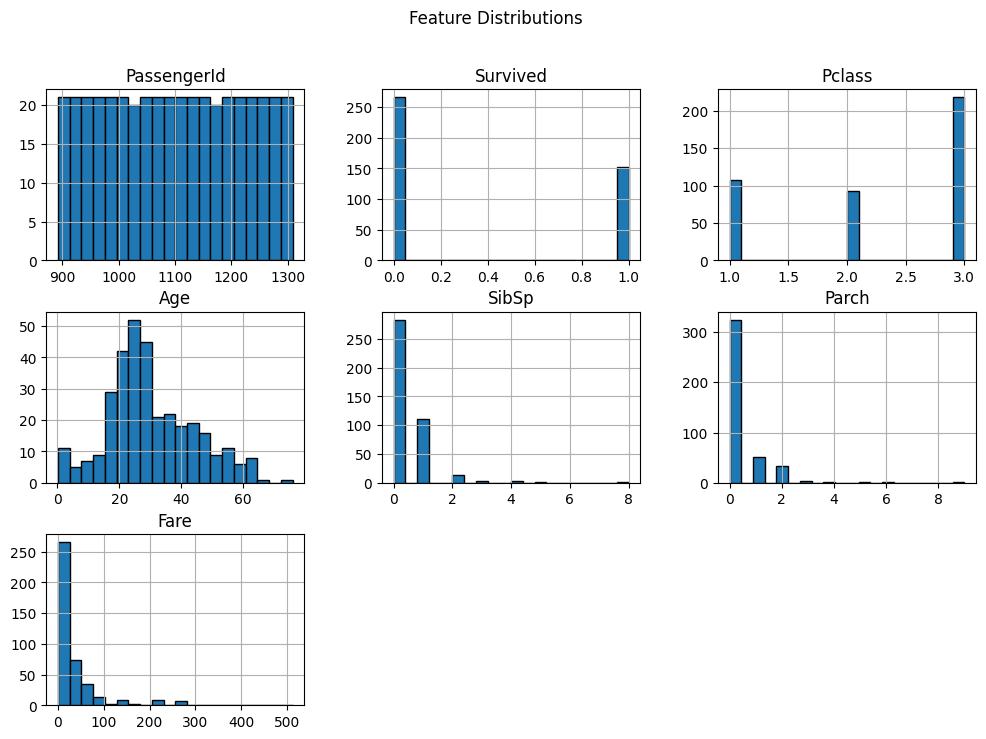

In [10]:
# Visualizations

# Histogram of numerical features
test_df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

<ipython-input-11-a9cf0d72c2a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Age", data=test_df, palette="Set2")


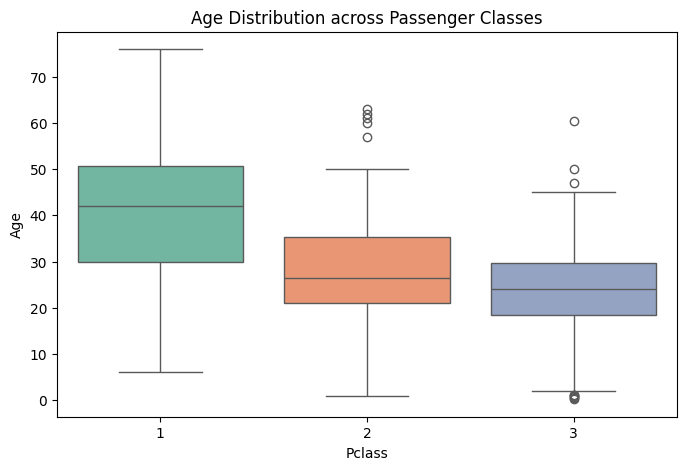

In [11]:
# Boxplot of Age distribution by Passenger Class
plt.figure(figsize=(8, 5))
sns.boxplot(x="Pclass", y="Age", data=test_df, palette="Set2")
plt.title("Age Distribution across Passenger Classes")
plt.show()

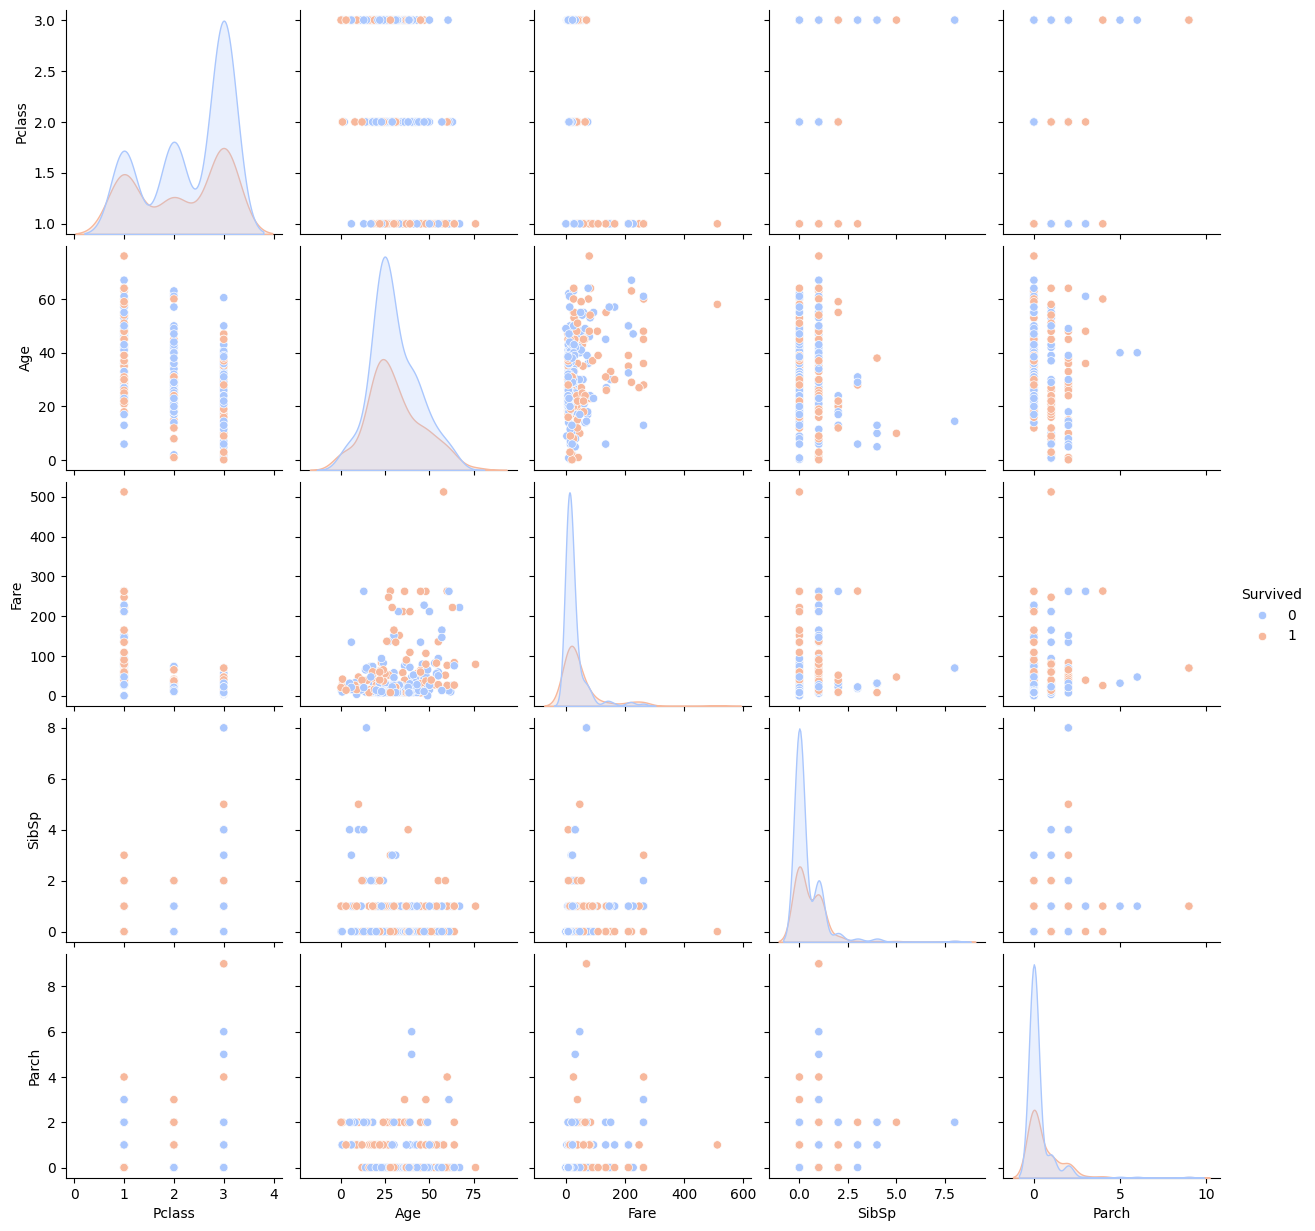

In [12]:
# Pairplot to visualize relationships between features
sns.pairplot(test_df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue="Survived", palette="coolwarm")
plt.show()


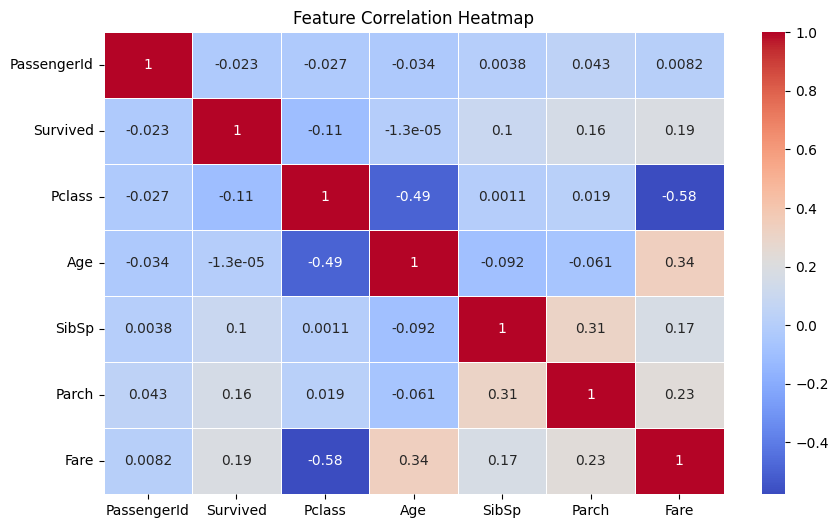

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
numerical_df = test_df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
#2. Data Preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [24]:
imputer = SimpleImputer(strategy="median")
# Fit the imputer to the 'Age' column
imputer.fit(test_df[["Age"]])
test_df["Age"] = imputer.transform(test_df[["Age"]])

In [25]:
# Fill missing Embarked values with the most frequent category
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)


<ipython-input-25-6b41ae801f31>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)


In [26]:
# Fill missing Fare values in test set with median
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


<ipython-input-26-1aa9b6c6f17f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


In [29]:

if 'Cabin' in test_df.columns:
    test_df.drop(columns=["Cabin"], inplace=True)
else:
    print("Column 'Cabin' not found in DataFrame.")

Column 'Cabin' not found in DataFrame.


In [31]:
#Encode Categorical Variables

# Convert categorical variables to numerical using Label Encoding
encoder = LabelEncoder()
# Fit the encoder to the 'Sex' column and then transform it
test_df["Sex"] = encoder.fit_transform(test_df["Sex"])

In [39]:
# Get unique 'Embarked' values
all_embarked_values = test_df['Embarked'].unique()

# Fit the encoder to the unique values
encoder.fit(all_embarked_values)

# Transform the 'Embarked' column
test_df["Embarked"] = encoder.transform(test_df["Embarked"])

In [41]:
# Display dataset after preprocessing
print(test_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    1  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    0  47.0      1      0   
2                     Myles, Mr. Thomas Francis    1  62.0      0      0   
3                              Wirz, Mr. Albert    1  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0  22.0      1      1   

    Ticket     Fare  Embarked  
0   330911   7.8292         1  
1   363272   7.0000         2  
2   240276   9.6875         1  
3   315154   8.6625         2  
4  3101298  12.2875         2  


In [42]:
#3. Model Building:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [43]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = test_df[features]
y = test_df["Survived"]

In [47]:
# Assuming X and y are defined as in your previous code
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

# Standardize numerical features for better performance
scaler = StandardScaler()
# Fit the scaler to the training data and transform it
X_train[["Age", "Fare"]] = scaler.fit_transform(X_train[["Age", "Fare"]])
# Use the fitted scaler to transform the validation data
X_val[["Age", "Fare"]] = scaler.transform(X_val[["Age", "Fare"]]) # Now X_val is defined

In [49]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# Print training accuracy
train_accuracy = model.score(X_train, y_train)
val_accuracy = model.score(X_val, y_val)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Training Accuracy: 1.0000
Validation Accuracy: 1.0000


In [51]:
#4. Model Evaluation:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [52]:
# Predict on the validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC curve


In [53]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

In [54]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC Score: 1.0000


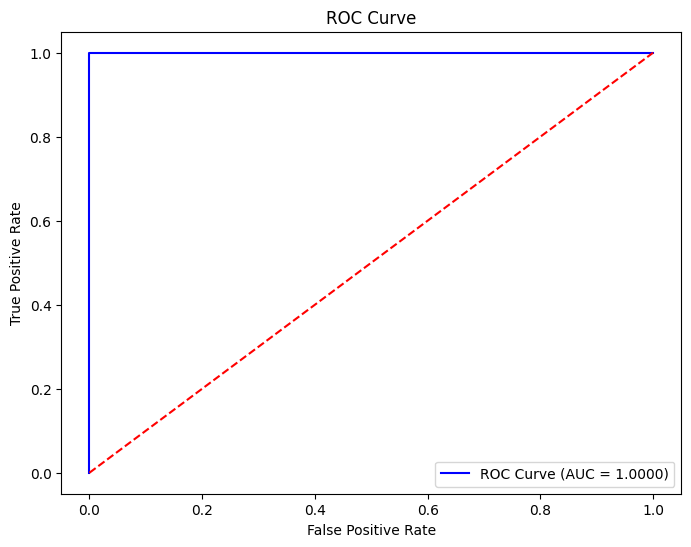

In [55]:
#Visualize the ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [56]:
#Deployment with Streamlit:

In [57]:
pip install streamlit scikit-learn pandas numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [58]:
import joblib

# Save the trained model
joblib.dump(model, "logistic_regression_model.pkl")

# Save the scaler (for feature scaling)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [59]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model and scaler
model = joblib.load("logistic_regression_model.pkl")
scaler = joblib.load("scaler.pkl")

# Streamlit App Title
st.title("Titanic Survival Prediction App")

# User Inputs
pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3])
sex = st.radio("Sex", ["Male", "Female"])
age = st.number_input("Age", min_value=1, max_value=100, value=30)
sibsp = st.number_input("Number of Siblings/Spouses Aboard (SibSp)", min_value=0, max_value=10, value=0)
parch = st.number_input("Number of Parents/Children Aboard (Parch)", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare Paid", min_value=0.0, max_value=600.0, value=32.0)
embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

# Convert categorical inputs to numerical
sex = 1 if sex == "Male" else 0
embarked_dict = {"C": 0, "Q": 1, "S": 2}
embarked = embarked_dict[embarked]

# Prepare input data
input_data = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])

# Scale numerical features
input_data[:, [2, 5]] = scaler.transform(input_data[:, [2, 5]])

# Predict survival probability
if st.button("Predict"):
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)[:, 1][0]

    if prediction[0] == 1:
        st.success(f"Survived! Probability: {probability:.2f}")
    else:
        st.error(f"Did Not Survive. Probability: {probability:.2f}")


Writing app.py


In [60]:
!python train_model.py

python3: can't open file '/content/train_model.py': [Errno 2] No such file or directory


In [61]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 5s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠴

In [62]:
!wget -q -o - ipv4.icanhazip.com
!streamlit run app.py & npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://130.211.203.133:8501

your url is: https://twenty-fans-warn.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
 